In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [6]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [7]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568969

In [8]:
X_train.shape

(353, 10)

Calculating <br> 
***y_pred = b0 + b1x1 + b2x2 .......<br>
or,
y_pred = b0 + dot_product(coeff_vec, x_train)***
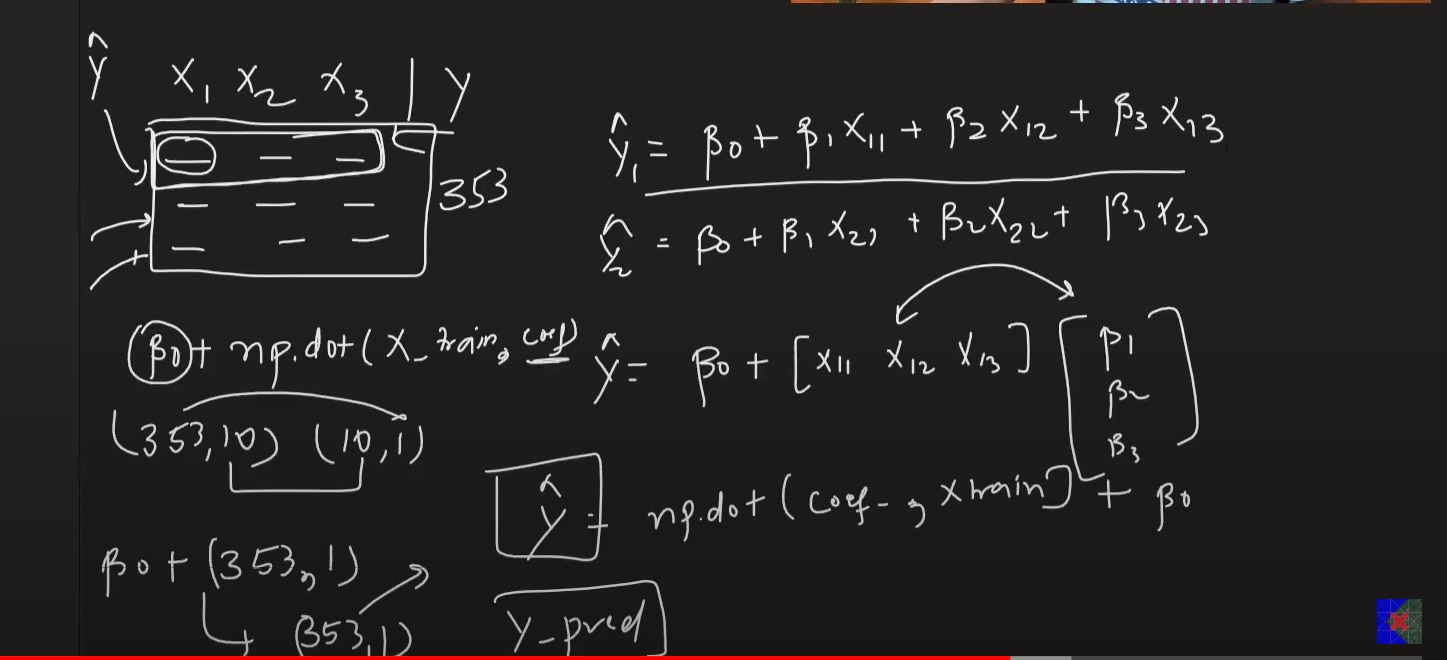

In [9]:
class GDRegressor:
    def __init__(self,learning_rate=0.01,epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    # fit will determine coeffs and intercept
    def fit(self,X_train,y_train):
        # init your coeffs
        self.intercept_ = 0
        # initialize all the coeffs (n+1) with 1
        self.coef_ = np.ones(shape=X_train.shape[1])
        
        for i in range(self.epochs):            
            # Calculating y_hat = b0 + dot([x1 x2 x3 ...][b1 b2 b3 ...])
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            # updates all the coeffs and the intercept in each iteraton    
            
            # calculating gradient for intecept(b0)
            intercept_der = -2 * np.mean(y_train - y_hat)
            
            # calculating new values of intecept(b0-new) = b0-old - learning_rate * gradient 
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            # coeff_der is a vector of all the gradients for each parameter (b)
            # del(L)/del(bn) where n=1,2,3.....
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print("intercept_: ",self.intercept_,"coeffs(b0...bn)",self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [20]:
gdr = GDRegressor(epochs=1000,learning_rate=0.05)

In [21]:
gdr.fit(X_train,y_train)

intercept_:  151.53202250911517 coeffs(b0...bn) [ 50.598881    -0.93844682 164.98807771 124.50199961  40.88482269
  25.30559969 -96.27364289  93.91947731 157.84610199  87.28464015]


In [22]:
y_pred = gdr.predict(X_test)

In [23]:
r2_score(y_test,y_pred)

0.3197625446711355